# PROTOCOLOS DE EVALUACIÓN

## 0. Import Libraries

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1. Load Data

In [34]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target


## 2. EDA

## 3. Model

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) # Try random_state=12

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 4. Evaluation

### 4.1. Train/Val/Test

In this case, we only use train and test sets.

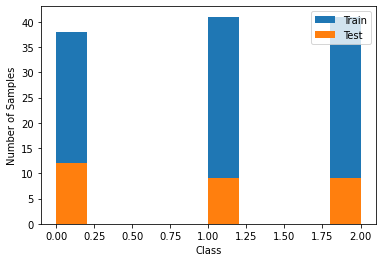

In [46]:
plt.hist(y_train, label='Train')
plt.hist(y_test,label='Test')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

plt.legend()
plt.show()

In [47]:
y_pred_train = knn.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.9666666666666667


In [48]:
y_pred_test = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_test))

0.9666666666666667


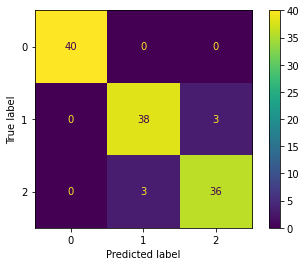

In [41]:
cm_knn = metrics.confusion_matrix(y_train,y_pred_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

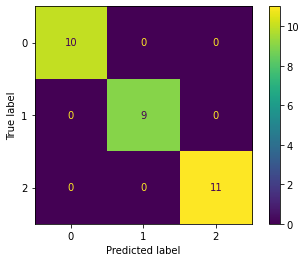

In [42]:
cm_knn = metrics.confusion_matrix(y_test,y_pred_test)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
plt.show()

### 4.2. Cross-Validation

Next, we will see how the data is partitioned into 5 folds.

In [11]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


#### a. Hyperparameter tunning

In [12]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]


In [13]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())


0.9666666666666666


In [49]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
k_scores_std = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    print('For k= ' + str(k) + ' accuracy = {:.4f} and std = {:.4f}'.format(scores.mean(),scores.std()))
    k_scores.append(scores.mean())
    k_scores_std.append(scores.std())


For k= 1 accuracy = 0.9600 and std = 0.0533
For k= 2 accuracy = 0.9533 and std = 0.0521
For k= 3 accuracy = 0.9667 and std = 0.0447
For k= 4 accuracy = 0.9667 and std = 0.0447
For k= 5 accuracy = 0.9667 and std = 0.0447
For k= 6 accuracy = 0.9667 and std = 0.0447
For k= 7 accuracy = 0.9667 and std = 0.0447
For k= 8 accuracy = 0.9667 and std = 0.0447
For k= 9 accuracy = 0.9733 and std = 0.0327
For k= 10 accuracy = 0.9667 and std = 0.0447
For k= 11 accuracy = 0.9667 and std = 0.0447
For k= 12 accuracy = 0.9733 and std = 0.0327
For k= 13 accuracy = 0.9800 and std = 0.0306
For k= 14 accuracy = 0.9733 and std = 0.0442
For k= 15 accuracy = 0.9733 and std = 0.0327
For k= 16 accuracy = 0.9733 and std = 0.0327
For k= 17 accuracy = 0.9733 and std = 0.0327
For k= 18 accuracy = 0.9800 and std = 0.0306
For k= 19 accuracy = 0.9733 and std = 0.0327
For k= 20 accuracy = 0.9800 and std = 0.0306
For k= 21 accuracy = 0.9667 and std = 0.0333
For k= 22 accuracy = 0.9667 and std = 0.0333
For k= 23 accuracy 

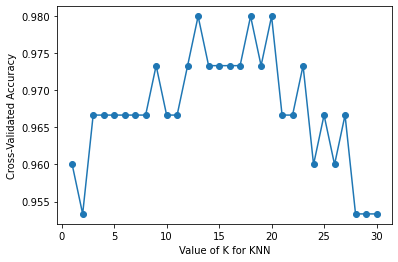

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

plt.show()

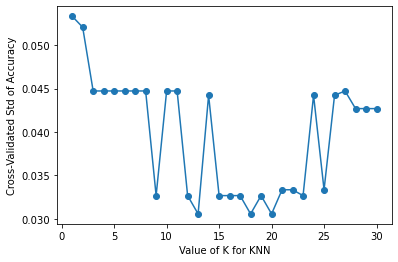

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores_std, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Std of Accuracy')

plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [51]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 13}

####b. Model selection

In [52]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print("Accuracy: ",scores.mean())
print("Std of Accuracy: ",scores.std())

Accuracy:  0.9800000000000001
Std of Accuracy:  0.030550504633038926


In [53]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
scores_logreg = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print("Accuracy: ",scores_logreg.mean())
print("Std of Accuracy: ",scores_logreg.std())

Accuracy:  0.9533333333333334
Std of Accuracy:  0.059999999999999984


In [21]:
knn

KNeighborsClassifier(n_neighbors=13)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
print("Accuracy in Training Set;: ",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy in Test Set;: ",metrics.accuracy_score(y_test, y_pred_test))

Accuracy in Training Set;:  0.9833333333333333
Accuracy in Test Set;:  0.9666666666666667


### c. Feature selection

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
# read in the advertising dataset
data = pd.read_csv('..\Datasets\Advertising.csv', index_col=0)


In [54]:
# create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.Sales


In [55]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
mse_scores = abs(cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error'))
print(mse_scores)


[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [56]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)


[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [57]:
# calculate the average RMSE
print(rmse_scores.mean())


1.6913531708051799


In [58]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
mse_scores = abs(cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error'))
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())


1.6796748419090768
